<a href="https://colab.research.google.com/github/JParraArias/SignalsAndSystems2024-2/blob/main/Modelado_de_SLITs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Ejercicios

## 1. Encuentre la funcion de transferencia que caracteriza el sistema masa, resorte, amortiguador, presentado en la siguiente Figura (asuma condiciones iniciales cero):

\begin{equation}
F_\text{S}(t) + F_\text{F}(t) + F_\text{I}(t) = F_\text{E}(t)
\end{equation}

\begin{equation}
F_\text{S}(t) = k y(t)
\end{equation}

\begin{equation}
F_\text{F}(t) = c \frac{d y(t)}{dt}
\end{equation}

\begin{equation}
F_\text{I}(t) = m \frac{d^2 y(t)}{dt^2}
\end{equation}

\begin{equation}
m \frac{d^2 y(t)}{dt^2} + c \frac{d y(t)}{dt} + k y(t) = F_\text{E}(t)
\end{equation}

Ahora aplicando transformada de Laplace:

\begin{equation}
\mathcal{L} \left\{ \frac{d^n y(t)}{dt^2} \right\} = s^n X(s)$
\end{equation}

\begin{equation}
m s^2 Y(s) + c s Y(s) + kY(s)=X(s)$
\end{equation}

\begin{equation}
H(s) = \frac{Y(s)}{X(s)} = \frac{1}{m s^2 + c s + k}
\end{equation}





## 2. Posteriormente, encuentre el sistema equivalente del modelo masa, resorte, amortiguador, a partir del siguiente circuito electrico:

\begin{equation}
V_i(s) = L s I_1(s) +(I_1(s)-I_2(s)) \frac{1}{C s}
\end{equation}

\begin{equation}
(I_2(s)-I_1(s)) \frac{1}{C s}+I_2(s)R=0
\end{equation}

\begin{equation}
V_o(s)=RI_2(s)
\end{equation}

Despejando $I_1$ en $I_2$:

\begin{equation}
\frac{1}{C s}I_2(s)-\frac{1}{C s}I_1(s) +I_2(s)R=0
\end{equation}

\begin{equation}
I_1(s)=I_2(s)(1+CRs)
\end{equation}

Se reemplaza en la primera ecuacion:

\begin{equation}
V_i(s)=LsI_2(s)(1+CRs)+(I_2(s)(1+CRs)-I_2(s))\frac{1}{C s}
\end{equation}

\begin{equation}
V_i(s)=LsI_2(s)+CRLs^2I_2(s)+I_2(s)\frac{1}{C s}+I_2(s)R-I_2(s)\frac{1}{C s}
\end{equation}

\begin{equation}
V_i(s)=I_2(s)(CRLs^2+Ls+R)
\end{equation}

\begin{equation}
\frac{I_2(s)}{V_i(s)}=\frac{1}{CRLs^2+Ls+R}
\end{equation}

\begin{equation}
\frac{RI_2(s)}{Vi(s)}=\frac{V_o(s)}{V_i(s)}=\frac{R}{CRLs^2+Ls+R}
\end{equation}

\begin{equation}
H(s)=\frac{V_o(s)}{V_i(s)}=\frac{1}{CRLs^2+\frac{L}{R} s+1}
\end{equation}

## 3. Proponga unos valores de m, k y c y sus equivalentes R, L y C, para simular un sistema subamortiguado, sobreamortiguado, y de amortiguamiento crítico (determine el factor de amortiguamiento, la frecuencia natural amortiguada, la frecuencia natural no amortiguada, el tiempo pico, tiempo de levantamiento y el tiempo de establecimiento en cada caso). Para cada caso, grafique el diagrama de polos y ceros, el diagrama de Bode, la respuesta impulso, respuesta escalon y respuesta rampa. Repita el proceso para modo lazo cerrado.

In [1]:
!pip install sympy --upgrade #actualizar sympy para usar módulo de control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 24.7 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstalled sympy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-nvrtc-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-nvrtc-cu12 12.5.82 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cud

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import sympy as sym
sym.init_printing()
#definiri variables
t, m, c, k = sym.symbols('t m c k', real=True,positive=True)
s = sym.symbols('s', complex=True)

Forma canónica:

\begin{equation}
H(s) = \frac{1}{a_2 s^2 + a_1 s + a_0}
\end{equation}

\begin{equation}
H(s) = K \frac{\omega_n^2}{s^2 + 2\zeta \omega_n s + \omega_n^2}
\end{equation}

In [3]:
#forma canónica del slit
a2 = m #CL en circuito equivalente
a1 = c #L/R en circuito equivalente
ao = k # 1 en circuito equivalente

Ko = 1/ao #ganancia circuito forma canónica
wn = sym.sqrt(ao/a2)
xi = a1/(2*sym.sqrt(ao*a2))
#función de transferencia
H = Ko*wn**2/(s**2+2*xi*wn*s+wn**2)
H

       1        
────────────────
  ⎛c⋅s   k    2⎞
m⋅⎜─── + ─ + s ⎟
  ⎝ m    m     ⎠

In [4]:
#calcular polos
p1 = -xi*wn + 1j*wn*sym.sqrt(1-xi**2)
p2 = -xi*wn - 1j*wn*sym.sqrt(1-xi**2)
p1

                      _____________
                     ╱     2       
                    ╱     c        
        1.0⋅ⅈ⋅√k⋅  ╱   - ───── + 1 
   c             ╲╱      4⋅k⋅m     
- ─── + ───────────────────────────
  2⋅m               √m             

Sistema subamortiguado:

\begin{equation}
0 < \zeta < 1
\end{equation}



\begin{equation}
0 < \frac{a_1}{2\sqrt{a_0 a_2}} < 1
\end{equation}

\begin{equation}
0 < \frac{c}{2\sqrt{k m}} < 1
\end{equation}

Se asume:

\begin{equation}
c = 1 = \frac{L}{R}
\end{equation}

\begin{equation}
L = 1, \quad R = 1
\end{equation}

\begin{equation}
k = 1
\end{equation}

\begin{equation}
m = 4 = C L
\end{equation}

\begin{equation}
C = 4
\end{equation}

\begin{equation}
\zeta = \frac{1}{4} = 0.25
\end{equation}

In [5]:
#Reemplazando los valores
mck = {m: 4.0, c: 1.0, k: 1.0}
mck

{c: 1.0, k: 1.0, m: 4.0}

In [6]:
print('p1=',p1.subs(mck))
print('p2=',p2.subs(mck))
print('xi=',xi.subs(mck))
print('omega_n=',wn.subs(mck))

p1= -0.125 + 0.484122918275927*I
p2= -0.125 - 0.484122918275927*I
xi= 0.250000000000000
omega_n= 0.500000000000000


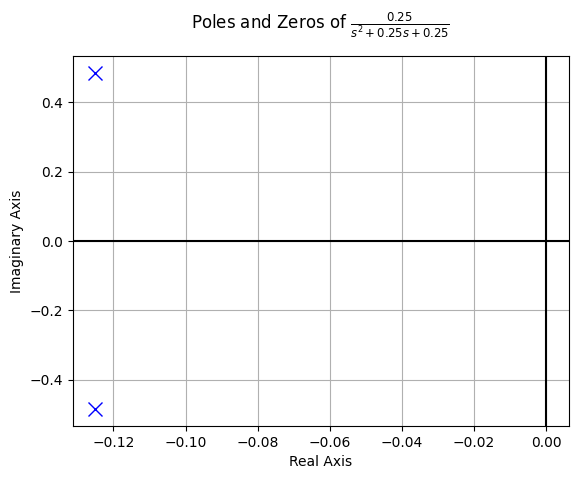

In [7]:
#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot, impulse_response_plot, step_response_plot
num,den=sym.fraction(H.subs(mck))

tf1 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf1)

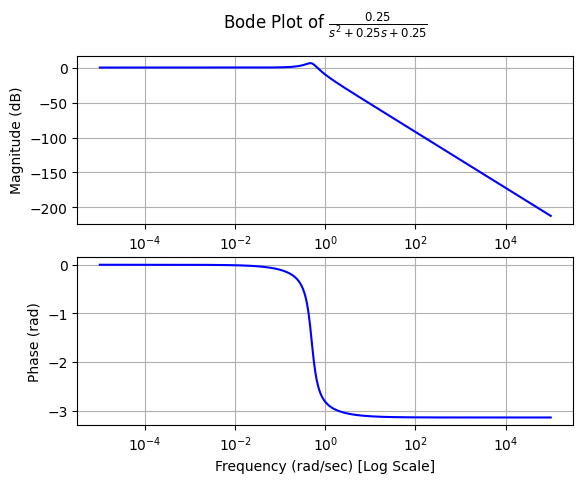

In [8]:
bode_plot(tf1)

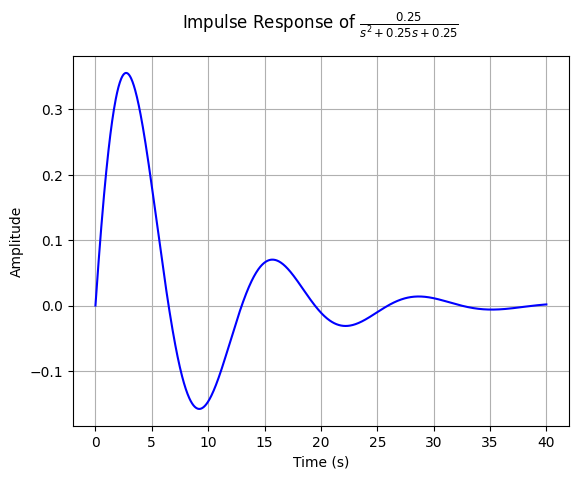

In [9]:
impulse_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

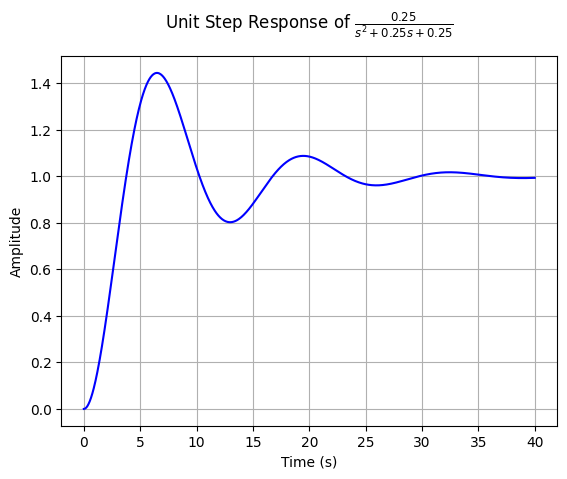

In [10]:
step_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))